QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:

NLP
Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
Ensemble methods and decision tree models
SVM models
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key. Note that most listings DO NOT come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:

What components of a job posting distinguish data scientists from other data jobs?
What features are important for distinguishing junior vs. senior positions?
Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?
You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.

# Executive summary

# Objective: 
Identify the main factors that impact salary and job category for a data related job. <BR>
Assumption is company already has an linear regression model to predict salary. <BR>
Goal is to see how NLP techinques can help.

# Approach: 
The dataset was prepared by scraping data related jobs from seek for Melbourne location.

## To find factors impacting Job Salary

Models used: Tf-idf vectoriser and Elastic net.  <BR>
Target: Salary <BR>
Predictors: Job title,Job level,Location,Job type(Contract or permanent), Job description <BR>
Job title was the main factor for predicting the salary of the job. 

## To find factors that categorised Job category:
Models used: Tf-idf vectoriser and Elastic net.  <BR>
Target: Job title <BR>
Predictors: Job title,Job level,Location,Job type(Contract or permanent),Job description <BR>





# Factors that impact salary:


## Main factors that impacted Job salary:
a) Location
b) Whether job was contract or permanent
c) Job title (Analyst, Scientist, Manager) 
d) Job level (Entry, Junior, Mid, Senior, Lead, Manager)
e) Key words in Job description

## Main factors that categorised Job category:
a) Job title (Analyst, Scientist, Manager) 
b) Job level (Entry, Junior, Mid, Senior, Lead, Manager)
c) Location
d) Key words in Job description


## Appendix
Please refer attached slide Project_4_Presentation_pramod_paul_v1_26May2019.pptx for more info.  
    

# Objective for question 1 : Factors that impact salary 

To identify factors that impact salary the following were explored in this notebook using NLP

1) Job Title: Word impact on salary <BR>
2) Filtered Job title: Word impact on salary <BR> 
3) Job description : Word impact on salary <BR>


In [5]:
import requests
from scrapy.selector import Selector
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

In [6]:
JobWSP = pd.read_csv('JobWSP_final_CSV.csv', sep =',')

In [5]:
JobWSP.head(20);

In [7]:
JobWSP.columns

Index(['Unnamed: 0', 'Job_url', 'Company_name', 'Job_title', 'Contract1',
       'Salary', 'Description', 'Job_no', 'Job_title_filt', 'Job_level'],
      dtype='object')

In [8]:
JobWSP.drop('Unnamed: 0', axis =1, inplace = True)

In [9]:
JobWSP.Job_level.replace(np.nan,'no info',inplace = True)

In [8]:
JobWSP.Job_title_filt.values

array(['Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Analyst',
       nan, 'Data Analyst', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data Analyst', nan,
       'Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Analyst',
       nan, 'Data Analyst', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Scientist',
       'Data Analyst', 'Data Analyst', nan, 'Data Analyst', nan, nan,
       'Data manager', nan, nan, nan, nan, nan, 'Data manager', nan, nan,
       nan, nan, 'Data manager', nan, 'Data manager', nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'Data manager', 'Data manager',
       'Data manager', 'Data manager', 

In [10]:
JobWSP.Job_title_filt.replace(np.nan,'no info',inplace = True)

In [11]:
#from sklearn.datasets import fetch_20newsgroups

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [30]:
import pyLDAvis.gensim

In [12]:
### Target = Job_title_filt
## Data is rest of columns
JobWSP_target = JobWSP['Job_title_filt'] 


In [13]:
JobWSP_Data = JobWSP.drop('Job_title_filt', axis =1)


In [115]:
JobWSP_Data.head(4)

,Job_url,Company_name,Job_title,Contract1,Salary,Description,Job_no,Job_level
0,https://www.seek.com.au/job/39063945?type=stan...,Talent ‚Äì Winner ‚ÄòSeek Large Recruitment Ag...,Data Analyst,Permanent,120000.0,div data automation mobiletemplate class e pi...,1,no info
1,https://www.seek.com.au/job/39044001?type=stan...,Premium IT Recruitment,"Data Conversion Analyst - Excel, VBA, SQL - $6...",Permanent,65700.0,div data automation mobiletemplate class e pi...,2,no info
2,https://www.seek.com.au/job/39054921?type=stan...,Fuse Recruitment,Commercial Data Analyst,Permanent,140000.0,div data automation mobiletemplate class e pi...,7,no info
3,https://www.seek.com.au/job/39040874?type=stan...,THE CAREER MEISTER,Japanese-speaking Junior Data Analyst,Permanent,60225.0,div data automation mobiletemplate class e pi...,9,Junior


In [149]:
#processed_article =     ''.join(processed_article)

#Test = Job_WSP_DV[0]
#processed_article =     ''.join(Test)

#processed_article = processed_article.lower()  
#processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )  
#processed_article = re.sub(r'\s+', ' ', processed_article)
#processed_article

' div data automation mobiletemplate class e pi b strong about the company xa strong br proudly australian owned and operated utlities comapany they are passionate about understanding the needs of households and small businesses that s why there model is built on better value simplicity and a broader product range br br strong about the role xa strong br in this position you will have the rare and exciting opportunity to develop high volume systems that will be used by clients across the globe br br strong requirement xa strong ul li preferably someone with energy utilities experience li li extensive experience with xa sql etl li li extensive experience with reporting skills ssrs ssis li li someone who can take ownership and see projects through to the end li li small team experiencethis position will suit someone that s come from a utility background with end to end experience in data analytics within sql etl environments aswell as strong reporting skills with ssrs ssis xa li ul stron

In [14]:
import re
import nltk

In [15]:
def Description_clean(Test):
    processed =     ''.join(Test)
    processed = processed.lower()  
    processed = re.sub('[^a-zA-Z]', ' ', processed )  
    processed = re.sub(r'\s+', ' ', processed)
    return processed


In [16]:
JobWSP_Data['Description'] = JobWSP_Data.Description.map(Description_clean)


In [17]:
JobWSP_Data_Desc_Val =  JobWSP_Data['Description'].values

In [18]:
JobWSP_Data_Desc_Val.tolist()

[' div data automation mobiletemplate class e pi b strong about the company xa strong br proudly australian owned and operated utlities comapany they are passionate about understanding the needs of households and small businesses that s why there model is built on better value simplicity and a broader product range br br strong about the role xa strong br in this position you will have the rare and exciting opportunity to develop high volume systems that will be used by clients across the globe br br strong requirement xa strong ul li preferably someone with energy utilities experience li li extensive experience with xa sql etl li li extensive experience with reporting skills ssrs ssis li li someone who can take ownership and see projects through to the end li li small team experiencethis position will suit someone that s come from a utility background with end to end experience in data analytics within sql etl environments aswell as strong reporting skills with ssrs ssis xa li ul stro

In [19]:
# job description from values 
Job_WSP_DV = JobWSP_Data.Description.values
#Job_WSP_D_Clean

In [23]:
Job_WSP_DV[0:2]

array([' div data automation mobiletemplate class e pi b strong about the company xa strong br proudly australian owned and operated utlities comapany they are passionate about understanding the needs of households and small businesses that s why there model is built on better value simplicity and a broader product range br br strong about the role xa strong br in this position you will have the rare and exciting opportunity to develop high volume systems that will be used by clients across the globe br br strong requirement xa strong ul li preferably someone with energy utilities experience li li extensive experience with xa sql etl li li extensive experience with reporting skills ssrs ssis li li someone who can take ownership and see projects through to the end li li small team experiencethis position will suit someone that s come from a utility background with end to end experience in data analytics within sql etl environments aswell as strong reporting skills with ssrs ssis xa li u

In [57]:
Job_WSP_DV[0:2].tolist()

[' div data automation mobiletemplate class e pi b strong about the company xa strong br proudly australian owned and operated utlities comapany they are passionate about understanding the needs of households and small businesses that s why there model is built on better value simplicity and a broader product range br br strong about the role xa strong br in this position you will have the rare and exciting opportunity to develop high volume systems that will be used by clients across the globe br br strong requirement xa strong ul li preferably someone with energy utilities experience li li extensive experience with xa sql etl li li extensive experience with reporting skills ssrs ssis li li someone who can take ownership and see projects through to the end li li small team experiencethis position will suit someone that s come from a utility background with end to end experience in data analytics within sql etl environments aswell as strong reporting skills with ssrs ssis xa li ul stro

In [20]:
Job_WSP_D_Clean = Job_WSP_DV.tolist()

In [21]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


In [127]:
# Tokenize and lemmatize
#def preprocess(text):
#    result=[]
#    for token in gensim.utils.simple_preprocess(text) :
#        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
#            result.append(lemmatize_stemming(token))
#            print(token)
#    return result

In [22]:
# only Tokenize, don't lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            #result.append(lemmatize_stemming(token))
            result.append(token)
            print(token)
    return result

In [23]:
processed_docs = []

In [24]:
for doc in Job_WSP_D_Clean:
    #print(doc)
    processed_docs.append(preprocess(doc))

data
automation
mobiletemplate
class
strong
company
strong
proudly
australian
owned
operated
utlities
comapany
passionate
understanding
needs
households
small
businesses
model
built
better
value
simplicity
broader
product
range
strong
role
strong
position
rare
exciting
opportunity
develop
high
volume
systems
clients
globe
strong
requirement
strong
preferably
energy
utilities
experience
extensive
experience
extensive
experience
reporting
skills
ssrs
ssis
ownership
projects
small
team
experiencethis
position
suit
come
utility
background
experience
data
analytics
environments
aswell
strong
reporting
skills
ssrs
ssis
strong
experience
education
strong
tertiary
qualifications
commercial
quantitative
discipline
example
statistics
science
business
commerce
proficiency
relational
databases
experience
demonstrable
ability
handle
structured
structed
data
sources
variety
sources
online
years
professional
experience
analyst
similar
role
experience
energy
credit
management
finance
environments
high

quality
outcomes
producing
articulate
documentation
enables
effective
decision
making
participate
change
initiatives
implement
ways
working
support
changing
technology
environment
approval
processes
moving
data
prem
cloud
strong
requirements
strong
fluent
data
language
years
experience
senior
business
analyst
large
complex
environment
years
specific
data
centric
projects
programs
strong
communication
interpersonal
skills
strong
stakeholder
management
background
ability
collaborate
influence
stakeholders
teams
deep
understanding
demonstrated
experience
cloud
data
projects
ability
operate
ambiguous
environment
ability
turn
customer
needs
detailed
business
requirements
apply
click
apply
dylan
campbell
class
zkuacf
data
contact
match
true
href
confidential
discussion
data
automation
mobiletemplate
class
strong
company
strong
superannuation
company
manage
funds
services
member
strong
corporate
culture
supportive
environment
strong
role
strong
data
analyst
role
created
membership
service
tea

strong
microstrategy
reporting
experience
powerbi
tableau
fine
experience
presenting
visualisations
business
stakeholders
strong
offer
strong
great
opportunity
progress
build
career
good
location
close
tram
lines
share
opportunity
organisation
apply
online
click
apply
button
confidential
discussion
role
contact
charlotte
weston
class
zkuacf
data
contact
match
true
href
data
automation
mobiletemplate
class
strong
initial
months
right
extend
strong
strong
projects
spread
tauranga
auckland
strong
strong
upto
hour
strong
currently
seeking
contract
data
analyst
intermediate
analyst
initial
months
term
right
extend
aimed
early
start
role
work
existing
team
data
warehouse
business
intelligence
professionals
offer
high
level
development
customised
solutions
number
clients
specific
focus
oracle
related
technologies
oracle
data
integrator
obiee
strong
essential
skills
encourage
success
application
strong
strong
data
analysis
strong
expect
minimum
commercial
experience
essential
previously
worked

test
complex
reports
systems
predominantly
practice
management
database
undertake
audit
ssrs
reports
currently
current
practice
management
migrate
server
working
data
visualization
tools
create
user
reporting
stories
experience
optimising
dashboards
focus
usability
performance
flexibility
testability
standardisation
work
developers
maintain
enhance
existing
applications
complement
companies
current
future
innovation
strategy
based
application
development
strong
requirements
strong
position
suit
enthusiastic
analyst
experience
similar
role
professional
services
environment
expert
knowledge
power
including
prior
experience
developing
dashboards
scheduling
distributing
reports
expert
knowledge
including
ability
develop
report
specifications
create
modify
reports
ssrs
expert
knowledge
microsoft
office
worksite
ability
understand
client
reporting
requirements
knowledge
experience
developing
following
desirable
framework
core
html
javsscript
jquery
exposure
finance
environment
ability
identi

zkuacf
data
contact
match
true
href
click
apply
considered
important
submitting
email
address
personal
information
apply
consent
information
collected
held
disclosed
accordance
collections
notice
privacy
policy
http
privacy
policy
data
automation
mobiletemplate
class
experienced
technical
business
analyst
needed
urgently
join
aviation
giant
pieces
project
work
commencing
soon
possible
king
business
critical
pieces
work
simultaneously
focusing
data
centre
relocation
application
development
piece
join
vibrant
office
passionate
likeminded
individuals
deliver
fast
paced
project
work
years
experience
business
analyst
technical
background
experience
working
large
enterprise
infrastructure
projects
strong
exposure
vmware
data
centre
relocation
virtualised
servers
experience
understanding
applications
handing
apps
strong
core
skillset
ability
work
large
number
stakeholder
groups
data
automation
mobiletemplate
class
quantitative
researcher
questioning
place
world
want
value
lives
australian
pop

strong
career
exciting
rewarding
directions
world
universities
strong
needs
platform
launch
satisfying
career
monash
space
support
career
kinds
exciting
directions
access
quality
research
infrastructure
learning
facilities
university
energetic
enthusiastic
minds
driven
challenge
expected
expand
know
learn
inspiring
empowering
thinkers
innovative
supportive
successful
great
breadth
depth
talent
monash
information
technology
leader
research
education
provide
ideal
environment
excel
located
melbourne
world
liveable
cities
strong
opportunity
strong
takes
initiative
faculty
information
technology
monash
university
faculty
information
technology
undergoing
period
significant
growth
growth
data
science
group
opportunity
outstanding
research
fellow
applied
data
science
successful
candidate
work
collaboratively
industry
academics
explore
theory
frameworks
tools
analysis
support
data
understanding
decision
making
successful
doctoral
qualification
progress
doctoral
qualification
strong
melbourne


ability
managing
manipulating
spatial
datasets
producing
cartographic
products
spatial
analysis
data
management
extensive
experience
esri
arcgis
software
suite
experience
managing
analysing
distributing
spatial
data
experience
adobe
suite
software
develop
mapping
data
presentation
including
based
mapping
systems
field
data
capture
applications
ability
wide
range
software
application
features
spatial
data
analysis
word
processing
spreadsheets
database
products
strong
application
include
updated
resume
cover
letter
response
following
questions
strong
provide
example
involved
project
collection
spatial
data
conjunction
internal
staff
external
organisations
steps
ensure
required
skills
available
internal
staff
external
organisations
assist
project
challenges
faced
overcome
challenges
provide
example
assisted
development
spatial
tool
collection
dissemination
publication
spatial
data
role
systems
employed
technical
challenges
faced
overcome
challenges
confidential
discussion
matthew
righetti

report
directly
general
manager
risk
clinical
governance
quality
innovation
strong
candidate
profile
strong
essential
current
ahpra
nursing
registration
desirable
qualifications
quality
systems
related
discipline
high
level
written
verbal
communication
skills
knowledge
legislation
regulations
evidence
based
best
practice
relevant
aged
care
implementation
utilisation
customer
feedback
systems
demonstrated
experience
audit
processes
complaint
risk
management
demonstrated
experience
incident
investigation
data
analysis
risk
identification
corrective
action
current
driver
license
strong
apply
strong
express
position
application
allow
contact
future
interesting
opportunities
submitting
application
position
agreeing
remedy
recruitment
privacy
policy
viewed
right
role
remedy
recruitment
work
closely
match
skills
expectations
right
opportunity
remedy
recruitment
works
hard
making
sure
ahead
pack
remedy
recruitment
understands
finding
meaningful
work
different
seeking
beginnings
taking
step
car

selection
criteria
forward
application
cover
letter
resume
completed
selection
criteria
document
class
data
contact
match
true
href
mailto
cancervic
cancervic
information
contact
nicola
guerin
research
fellow
class
data
contact
match
true
href
mailto
cbrc
cancervic
cbrc
cancervic
strong
cancer
council
contact
applicants
shortlisted
interview
unable
respond
recruitment
agency
enquiries
strong
strong
offers
employment
subject
satisfactory
completion
employment
checks
including
evidence
right
work
australia
national
police
check
strong
strong
applications
close
sunday
june
strong
data
automation
mobiletemplate
class
looking
ambitious
management
accountant
looking
progress
careeer
high
performing
finance
team
time
contract
basis
permanent
advancement
opportunities
availalable
right
candidate
located
inner
western
suburbs
highly
respected
maintanence
services
organisation
great
culture
working
friendly
team
reporting
commercial
manager
hands
role
require
perform
following
duties
performance

monitoring
contractor
performance
attainment
performance
indicators
kpis
role
requires
highly
developed
organisational
skills
coupled
attention
ability
cope
pressure
excellent
communication
skills
customer
service
focus
integral
position
dealing
internal
external
customers
perform
effectively
role
possess
strong
communicator
particular
emphasis
listening
influencing
expressing
opinions
credibility
results
driven
customer
service
focused
ability
follow
instructions
procedures
ability
adapt
change
workplace
balancing
work
commitments
working
pressure
benefits
working
include
generous
employee
benefits
competitive
salary
packing
including
performance
bonus
employer
superannuation
contribution
flexible
work
arrangements
including
family
friendly
provisions
benefits
working
outcome
focused
government
business
enterprise
development
acquisition
delivery
sales
responsibility
diverse
range
interesting
projects
high
performing
collaborative
work
environment
eligibility
remuneration
package
nego

year
dates
rmit
calendar
open
notice
given
advance
strong
culture
strong
people
university
possible
encourage
approaches
work
learning
stimulating
change
drive
positive
impact
rmit
exists
create
transformative
experiences
students
getting
ready
life
work
productive
collaborative
team
values
working
relationships
outcomes
open
inclusive
planning
continuous
information
sharing
transparent
work
practices
strong
benefits
strong
flexible
working
arrangements
access
free
wellness
fitness
classes
salary
increase
year
annual
leave
loading
myki
pass
discount
additional
annual
leave
visit
website
href
https
rmit
careers
employee
benefits
target
blank
strong
rmit
employee
benefits
strong
strong
apply
strong
apply
role
submit
cover
letter
outlining
experience
information
position
position
description
href
https
secure
pageuppeople
apply
ashx
sdata
ufutvjmtsxsh
ethyut
bcqkdt
oxogu
epkvop
funzy
hmwpxq
jbzhdnhxozcu
ypddermbs
kvbzmdeu
okvgrwrd
usqs
ujofjmpc
sacj
target
blank
prospective
student
office

organising
data
supporting
funding
applications
performing
critical
literature
reviews
proactive
attendance
team
meetings
relevant
seminars
staff
meetings
strong
skills
experience
strong
quantitative
discipline
bioinformatics
computational
biology
science
statistics
epidemiology
science
discipline
biochemistry
molecular
biology
genetics
genomics
substantial
quantitative
component
research
experience
following
area
statistical
genomics
computational
biology
bioinformatics
high
competency
statistical
computational
analysis
large
datasets
high
level
interpersonal
skills
enable
appointee
liaise
effectively
wide
range
people
variety
levels
internal
external
institute
demonstrated
ability
unix
based
systems
computing
clusters
modern
scripting
programming
languages
including
demonstrated
ability
produce
high
quality
results
meet
deadlines
compromising
close
attention
accuracy
proven
capacity
work
member
team
autonomously
close
supervision
demonstrated
ability
lead
contribute
high
impact
resea

leadership
support
marketing
leaders
senior
stakeholders
build
positive
relationship
clients
understanding
business
analytics
business
environment
strong
requirements
strong
years
experience
marketing
campaign
analytics
experience
managing
analytics
team
technical
skills
different
analytical
technologies
python
advanced
excel
data
automation
mobiletemplate
class
strong
description
strong
financial
planning
analysis
analyst
report
directly
divisional
head
finance
play
pivotal
role
supporting
organisation
providing
meaningful
analysis
insights
business
performance
effective
finance
business
partner
internal
stakeholders
assisting
operational
managers
financial
planning
contract
margin
improvements
labour
rates
capital
expenditure
cost
control
project
controls
duties
role
include
limited
following
analyse
costs
variable
contributions
margin
results
project
actual
performance
compared
budget
forecast
plans
controlling
income
cash
flow
expenditure
analyse
financial
project
information
ident

expertise
technical
security
technical
risk
conduct
root
cause
analysis
incidents
required
instruction
provide
internal
systems
testing
capability
ongoing
improvement
identify
manage
remediation
vulnerabilities
existing
systems
manage
vulnerabilities
procedures
systems
expose
john
holland
threats
data
breaches
investigate
evaluate
software
facilities
advise
project
manager
suitability
facilities
satisfying
user
needs
conduct
comprehensive
tests
prepare
documentation
programming
perform
duties
accordance
john
holland
policies
processes
systems
procedures
provide
regular
reporting
security
events
ensure
steadfast
adherence
daily
weekly
monthly
quarterly
tasks
identified
assess
technical
aspects
proposed
solutions
cloud
implementations
solution
development
deployments
lead
implementation
security
products
security
projects
organisation
internal
stakeholders
information
security
manager
security
consultant
development
team
infrastructure
team
wider
staff
business
owners
external
stakeholde

work
hard
drive
innovation
culture
team
regularly
social
events
flexible
working
environment
strong
role
strong
reporting
general
manager
working
maintain
grow
existing
client
referral
relationships
play
pivotal
role
interface
client
loan
processing
teams
ensure
clients
needs
timely
satisfactory
experience
recommend
solutions
personal
loans
strong
general
tasks
strong
meet
accounting
referred
clients
finance
needs
obtain
information
necessary
ensure
successful
loan
application
undertake
external
sales
activities
source
finance
leads
maintain
stakeholder
relationships
external
internal
stakeholders
ensure
lending
mind
internal
referrers
actively
review
accounting
database
account
ting
staff
identify
lending
opportunities
process
finance
applications
start
finish
time
frame
meets
expectations
required
clients
ensure
finance
deals
compliant
statutory
regulations
approve
loans
specified
limits
refer
loan
applications
outside
limits
management
approval
analysis
applicants
financial
status
c

sportsbook
products
clients
worldwide
join
team
modern
offices
melbourne
boast
excellent
views
team
lunches
friday
company
retreats
friendly
environment
table
tennis
competitions
strong
role
strong
looking
time
business
analyst
experience
extensive
sportsbook
management
trading
operations
experience
join
business
order
help
company
objectives
online
sportsbook
industry
role
responsible
analysis
data
driven
recommendation
implementation
improvement
current
organisational
framework
sportsbet
portfolio
including
operational
organisation
business
processes
systems
management
profitability
role
report
ensure
organisational
objectives
strategies
appropriate
implementation
systems
processes
strong
strong
help
develop
product
strategy
scoping
contribute
production
overall
product
delivery
roadmap
aims
deliver
business
strategy
goals
develop
recommendations
based
industry
best
practice
organisational
structure
existing
workflows
internal
data
meet
business
financial
targets
implement
risk
manag

analysis
complex
situations
identifying
practical
effective
response
mitigation
strategies
continuously
collaborate
programs
local
market
implementation
execution
innovation
projects
personnel
security
physical
security
security
governance
activities
requirements
extensive
demonstrated
experience
fraud
detection
implementation
industry
emphasis
financial
sector
demonstrated
experience
managing
highly
technical
detailed
fraud
cases
effectively
communicate
technical
research
findings
case
studies
high
levels
management
business
knowledge
protective
security
systems
strategies
including
electronic
security
systems
access
control
systems
screening
processes
apply
click
apply
todd
graham
class
zkuacf
data
contact
match
true
href
confidential
discussion
data
automation
mobiletemplate
class
data
science
lead
responsible
discovering
insights
building
predictive
forecasting
models
identifying
opportunities
advanced
analytical
visualization
techniques
addition
role
involves
investigating
integra

guidance
senior
research
scientists
engineers
working
collaboratively
honestly
internal
external
colleagues
clients
partners
develop
progress
challenging
realistic
research
plans
range
research
projects
strong
strong
strong
ocation
strong
strong
strong
clayton
preferred
docklands
negotiable
strong
strong
strong
salary
strong
strong
strong
plus
superannuation
strong
strong
strong
tenure
strong
strong
strong
indefinite
strong
strong
strong
reference
strong
strong
strong
strong
strong
strong
successful
need
strong
strong
strong
doctorate
equivalent
research
experience
relevant
discipline
statistics
mathematics
machine
learning
demonstrable
experience
analysis
large
complex
datasets
statistics
machine
learning
theoretical
practical
understanding
statistical
machine
learning
techniques
bayesian
methods
mcmc
support
vector
machines
gradient
boosting
deep
learning
experience
programming
languages
python
statistical
machine
learning
tools
stan
xgboost
tensorflow
theano
keras
fluent
proven
abil

learning
predictive
analytics
machine
learning
python
extract
actionable
insights
deliver
best
solutions
work
partners
critically
assess
business
requirements
data
sources
expected
outcomes
skills
proven
experience
applying
advanced
analytics
variety
cases
sound
working
knowledge
experience
machine
learning
techniques
experience
applying
statistical
modelling
machine
learning
algorithms
structured
unstructured
data
experience
coding
building
models
manipulating
data
python
advanced
skills
mathematics
statistics
science
related
field
excellent
opportunity
data
scientist
looking
solve
community
based
issues
passionate
driving
positive
value
victoria
information
corrin
class
zkuacf
data
contact
match
true
href
click
apply
today
important
submitting
email
address
personal
information
apply
consent
information
collected
held
disclosed
accordance
collections
notice
privacy
policy
http
privacy
policy
data
automation
mobiletemplate
class
data
engineer
required
build
applications
support
data
s

xcie
rsqnc
pcvhqi
flio
ajarvgbzkyi
target
blank
machine
learning
senior
lecturer
href
https
secure
pageuppeople
apply
ashx
sdata
ufutvjmtm
jkrvkptc
xxyvowbjglyb
vwjsg
irzbggyd
uruatkzpxspn
lacgs
fdnd
vpppadh
apjuv
yycw
uibgzigr
xqbbwbfexcud
xfkskw
target
blank
lecturer
href
https
secure
pageuppeople
apply
ashx
sdata
ufutvjmt
zaif
cadzefjq
oklwtjzm
pcydembxnvk
qbjsxee
kkbuxh
dqxa
target
blank
senior
lecturer
strong
apply
follow
links
strong
href
http
careers
pageuppeople
lecturer
senior
lecturers
machine
learning
target
blank
apply
machine
learning
href
http
careers
pageuppeople
lecturer
senior
lecturers
target
blank
apply
strong
closing
date
strong
sunday
june
aest
data
automation
mobiletemplate
class
strong
strong
strong
location
strong
clayton
campus
strong
employment
type
strong
time
strong
duration
strong
continuing
appointment
strong
remuneration
strong
level
level
plus
employer
superannuation
strong
inspired
strong
strong
career
exciting
rewarding
directions
world
universities
st

privacy
preserving
systems
design
information
theory
applied
cryptography
techniques
security
privacy
measurement
modelling
strong
strong
proven
experience
apply
research
potentially
impactful
applications
real
life
domains
including
health
future
smart
cities
digital
data
platforms
security
safety
details
contact
information
view
href
http
csiro
media
positions
data
docx
target
blank
position
description
strong
csiro
commitment
diversity
strong
working
hard
recruit
diverse
people
ensure
people
feel
supported
best
work
empowered
ideas
flourish
strong
flexible
working
arrangements
strong
work
flexibly
csiro
offering
range
options
work
talk
role
flexible
href
https
csiro
careers
csiro
experience
balance
target
blank
balance
strong
csiro
strong
csiro
helping
solve
complex
problems
real
difference
future
spark
learn
trust
collaborate
achieve
individually
supportive
rewarding
inclusive
truly
flexible
environment
strong
strong
csiro
href
https
data
csiro
target
blank
data
business
unit
large

In [25]:
len(processed_docs)

143

In [26]:
processed_docs

[['data',
  'automation',
  'mobiletemplate',
  'class',
  'strong',
  'company',
  'strong',
  'proudly',
  'australian',
  'owned',
  'operated',
  'utlities',
  'comapany',
  'passionate',
  'understanding',
  'needs',
  'households',
  'small',
  'businesses',
  'model',
  'built',
  'better',
  'value',
  'simplicity',
  'broader',
  'product',
  'range',
  'strong',
  'role',
  'strong',
  'position',
  'rare',
  'exciting',
  'opportunity',
  'develop',
  'high',
  'volume',
  'systems',
  'clients',
  'globe',
  'strong',
  'requirement',
  'strong',
  'preferably',
  'energy',
  'utilities',
  'experience',
  'extensive',
  'experience',
  'extensive',
  'experience',
  'reporting',
  'skills',
  'ssrs',
  'ssis',
  'ownership',
  'projects',
  'small',
  'team',
  'experiencethis',
  'position',
  'suit',
  'come',
  'utility',
  'background',
  'experience',
  'data',
  'analytics',
  'environments',
  'aswell',
  'strong',
  'reporting',
  'skills',
  'ssrs',
  'ssis',
  's

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import string

In [31]:
JobWSP['Salary'].values;

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


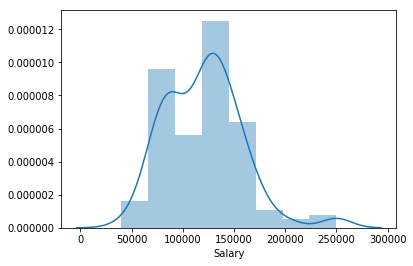

In [29]:
sns.distplot(JobWSP['Salary'], bins=8)
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression()
dummy = DummyClassifier()

In [33]:
#from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score, train_test_split

In [37]:
## checking Job title
tfidf = TfidfVectorizer()
key_words = tfidf.fit_transform(JobWSP.Job_title).toarray()
print(JobWSP_Data.shape)
print(key_words.shape)

(143, 8)
(143, 202)


In [35]:
key_words

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
y = JobWSP.Salary.values
key_words = pd.DataFrame(key_words)

In [39]:
X = key_words

In [40]:
elastic = ElasticNetCV(cv =5)
elastic.fit(X,y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

# Job Title ..word impact on salary

In [41]:
word_impact = pd.DataFrame()
word_impact['word'] = tfidf.get_feature_names()
word_impact['elasticnet_coef'] = elastic.coef_
sorted_words = word_impact['elasticnet_coef'].sort_values(ascending = False)[:40]


In [42]:
word_impact.columns

Index(['word', 'elasticnet_coef'], dtype='object')

In [43]:
Sorted = word_impact.sort_values(by ='elasticnet_coef', ascending = False)

In [44]:
Sorted[:40]

,word,elasticnet_coef
52,data,967.045750
29,business,966.454170
98,lead,802.100067
168,senior,716.314833
166,scientist,678.303401
56,development,470.400432
107,manager,417.289391
68,finance,295.017453
87,insights,262.293259
25,bi,253.465225


# Keywords ..Word Impact ..Job Title Filt  on Salary

In [45]:
## checking Job title_filt
tfidf = TfidfVectorizer()
key_words = tfidf.fit_transform(JobWSP.Job_title_filt).toarray()
print(JobWSP_Data.shape)
print(key_words.shape)

(143, 8)
(143, 6)


In [46]:
y = JobWSP.Salary.values
key_words = pd.DataFrame(key_words)

In [47]:
X = key_words

In [48]:
elastic = ElasticNetCV(cv = 5)
elastic.fit(X,y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [49]:
word_impact = pd.DataFrame()
word_impact['word'] = tfidf.get_feature_names()
word_impact['elasticnet_coef'] = elastic.coef_
sorted_words = word_impact['elasticnet_coef'].sort_values(ascending = False)[:40]
Sorted = word_impact.sort_values(by ='elasticnet_coef', ascending = False)
Sorted 

,word,elasticnet_coef
3,manager,602.923884
1,data,558.403912
5,scientist,352.314777
0,analyst,125.508429
2,info,-863.899158
4,no,-863.899168


# Key Words - Job Description with salary

In [50]:
#Job_WSP_D_Clean
## checking Job description word impact on salary
tfidf = TfidfVectorizer()
key_words = tfidf.fit_transform(Job_WSP_D_Clean).toarray()
print(JobWSP_Data.shape)
print(key_words.shape)

(143, 8)
(143, 4328)


In [51]:
y = JobWSP.Salary.values
key_words = pd.DataFrame(key_words)

In [52]:
X = key_words

In [53]:
elastic = ElasticNetCV(cv = 5)
elastic.fit(X,y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [59]:
word_impact = pd.DataFrame()
word_impact['word'] = tfidf.get_feature_names()
word_impact['elasticnet_coef'] = elastic.coef_
sorted_words = word_impact['elasticnet_coef'].sort_values(ascending = False)[:40]
Sorted = word_impact.sort_values(by ='elasticnet_coef', ascending = False)
Sorted[:40]

,word,elasticnet_coef
2239,li,951.847852
525,business,687.003530
1012,data,532.021549
481,br,457.422712
3700,strong,387.642775
1550,financial,384.015475
4023,understanding,286.376259
973,csiro,283.699676
2326,machine,252.983892
3473,senior,251.124303


# Question 2:

# Factors that distinguish the various job categories

## For this Job description text is used to classify the various job categories of Analyst, Scientist and Manager 

In [ ]:
#Classification of text documents using sparse features
#This is an example showing how scikit-learn can be used 
#to classify documents by topics using a bag-of-words approach. 
#This example uses a scipy.sparse matrix to store the features and 
#demonstrates various classifiers that can efficiently handle sparse matrices.
#The dataset used in this example is the 20 newsgroups dataset. 
#It will be automatically downloaded, then cached.
#The bar plot indicates the
#accuracy, training time (normalized) and test time (normalized) of each classifier.
#https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py

In [54]:
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [ ]:
#Target - Job_title_filt
#Divide dataframe into 
#  description only..

#JobWSP_Data
#JobWSP_Target - Job_title_filt


In [61]:
Job_WSP_D_Clean[0:100]

[' div data automation mobiletemplate class e pi b strong about the company xa strong br proudly australian owned and operated utlities comapany they are passionate about understanding the needs of households and small businesses that s why there model is built on better value simplicity and a broader product range br br strong about the role xa strong br in this position you will have the rare and exciting opportunity to develop high volume systems that will be used by clients across the globe br br strong requirement xa strong ul li preferably someone with energy utilities experience li li extensive experience with xa sql etl li li extensive experience with reporting skills ssrs ssis li li someone who can take ownership and see projects through to the end li li small team experiencethis position will suit someone that s come from a utility background with end to end experience in data analytics within sql etl environments aswell as strong reporting skills with ssrs ssis xa li ul stro

In [55]:
df = pd.DataFrame(Job_WSP_D_Clean)

In [56]:
df.shape

(143, 1)

In [57]:
df.head(5)

,0
0,div data automation mobiletemplate class e pi...
1,div data automation mobiletemplate class e pi...
2,div data automation mobiletemplate class e pi...
3,div data automation mobiletemplate class e pi...
4,div data automation mobiletemplate class e pi...


In [113]:
X_Train = Job_WSP_D_Clean[0:100]

In [114]:
len(X_Train)

100

In [112]:
X_test = Job_WSP_D_Clean[100:]

In [92]:
X_test

[' div data automation mobiletemplate class e pi b p advanced pulmonary and sleep diagnostics is melbourne based respiratory and sleep diagnostic service our services include sleep study setup and analysis lung function testing and respiratory and sleep physician consultations across victoria p p as we are rapidly expanding we require enthusiastic team members with initiative and good communication skills to take on this role xa p p position summary br this position will require the successful applicant to work as a part of a multi disciplinary team playing an essential role for p ul li performing sleep monitoring set ups portable home based sleep studies li li sleep studies analysis and scoring li li sleep data downloads and associated paperwork li li equipment set up maintenance and cleaning inline with infection control guidelines li li general office duties li li duties as directed by the head scientist li ul p this is a permanent part time grade sleep scientist position monday fri

In [115]:
len(X_test)

43

In [64]:
Target = pd.DataFrame(JobWSP_target)

In [111]:
y_train = Target[0:100]
y_test = Target[100:]

In [116]:
y_train.shape

(100, 1)

In [117]:
y_test.shape

(43, 1)

In [118]:
y_test = y_test.values


In [119]:
y_test = y_test.ravel()

In [120]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english')
#X_Train = vectorizer.fit_transform(X_Train)

In [76]:
#vectorizer = TfidfVectorizer(max_df=5,stop_words='english')

In [121]:
#
X_train = vectorizer.fit_transform(X_Train).toarray()


In [87]:
#X_test = vectorizer.fit_transform(X_test).toarray()

In [94]:
X_test

[' div data automation mobiletemplate class e pi b p advanced pulmonary and sleep diagnostics is melbourne based respiratory and sleep diagnostic service our services include sleep study setup and analysis lung function testing and respiratory and sleep physician consultations across victoria p p as we are rapidly expanding we require enthusiastic team members with initiative and good communication skills to take on this role xa p p position summary br this position will require the successful applicant to work as a part of a multi disciplinary team playing an essential role for p ul li performing sleep monitoring set ups portable home based sleep studies li li sleep studies analysis and scoring li li sleep data downloads and associated paperwork li li equipment set up maintenance and cleaning inline with infection control guidelines li li general office duties li li duties as directed by the head scientist li ul p this is a permanent part time grade sleep scientist position monday fri

In [122]:
### extracting features from the same vectorizer
X_test = vectorizer.transform(X_test)

In [123]:
feature_names = vectorizer.get_feature_names()

In [124]:
feature_names

['ability',
 'able',
 'aboriginal',
 'abroad',
 'absolute',
 'absoluteit',
 'absolutely',
 'abundance',
 'ac',
 'academic',
 'academics',
 'accelerate',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'acclaimed',
 'accommodation',
 'accordance',
 'account',
 'accountabilities',
 'accountability',
 'accountable',
 'accountant',
 'accounting',
 'accounts',
 'accreditation',
 'accruals',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieving',
 'acquiring',
 'acquisition',
 'acsep',
 'act',
 'acting',
 'action',
 'actionable',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'acts',
 'actual',
 'acumen',
 'ad',
 'adams',
 'adapt',
 'adaptable',
 'add',
 'adding',
 'addition',
 'additional',
 'address',
 'addressing',
 'adelaide',
 'adherence',
 'administer',
 'administration',
 'administrative',
 'administrator',
 'adminsistrator',
 'adobe',
 'ads',
 'advance',
 'advanced',
 'advancement',
 'advanc

In [125]:
X_train.shape

(100, 3417)

In [126]:
X_test.shape

(43, 3417)

In [127]:
y_train.shape

(100, 1)

In [128]:
y_test.shape

(43,)

In [129]:
y_train = y_train.values

In [130]:
y_train =  y_train.ravel()

In [131]:
# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
NB = MultinomialNB(alpha=.01)
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)




Naive Bayes
accuracy:   0.535


In [132]:
# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Bernoulli Naive Bayes")
BNB = BernoulliNB(alpha=.01)
BNB.fit(X_train, y_train)
pred = BNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)




Bernoulli Naive Bayes
accuracy:   0.512


In [ ]:
RandomForestClassifier(n_estimators=100)

In [133]:
# Train RandomForestClassifier classifiers
print('=' * 80)
print("RandomForestClassifier")
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)



RandomForestClassifier
accuracy:   0.535


In [136]:
RF.feature_importances_

array([5.43333544e-03, 8.23999640e-05, 3.18543800e-04, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [137]:
RF.n_features_

3417

In [134]:
pred

array(['no info', 'Data Analyst', 'Data Analyst', 'no info', 'no info',
       'Data Analyst', 'no info', 'Data Analyst', 'no info',
       'Data Analyst', 'Data Analyst', 'no info', 'Data Analyst',
       'no info', 'no info', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data Scientist', 'Data Scientist',
       'no info', 'no info', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Scientist', 'Data Analyst', 'Data Analyst',
       'no info', 'no info', 'no info', 'no info', 'no info', 'no info',
       'Data Analyst', 'Data Analyst', 'no info', 'no info', 'no info',
       'no info', 'no info', 'no info'], dtype=object)

In [135]:
y_test

array(['Data Scientist', 'Data Analyst', 'Data Analyst', 'no info',
       'no info', 'no info', 'Data manager', 'Data Analyst', 'no info',
       'Data Analyst', 'no info', 'no info', 'no info', 'Data manager',
       'Data manager', 'no info', 'no info', 'Data manager',
       'Data Analyst', 'Data Scientist', 'Data Scientist',
       'Data Scientist', 'Data Scientist', 'Data Scientist', 'no info',
       'Data Scientist', 'Data Scientist', 'no info', 'no info',
       'no info', 'no info', 'no info', 'no info', 'no info', 'no info',
       'Data Analyst', 'no info', 'Data Scientist', 'Data Scientist',
       'no info', 'no info', 'no info', 'no info'], dtype=object)

In [95]:
 # Train SGD with Elastic Net penalty
print("Elastic-Net penalty")


SGD = SGDClassifier(alpha=.0001,penalty="elasticnet")
SGD.fit(X_train, y_train)
pred = SGD.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)



Elastic-Net penalty
accuracy:   0.512


/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [92]:
 # Train Liblinear model
    

print("LinearSVC")


LS = LinearSVC(dual=False, tol=1e-3)
LS.fit(X_train, y_train)
pred = LS.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)






LinearSVC
accuracy:   0.535


In [96]:


# Train SGD model
print("SGD")
SG = SGDClassifier(alpha=.0001, max_iter=50 )
SG.fit(X_train, y_train)
pred = SG.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)



SGD
accuracy:   0.535


/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
